<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Consensus_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
colon_majority = pd.read_csv("https://raw.githubusercontent.com/disha2sinha/Reducing-Imbalanced-dataset-by-Under-sampling-approach-Consensus-Clustering/main/Datasets/colon_majority.csv")
colon_majority.head()

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C1,C2,C3
0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.07120,3166.5800,930.3038,2018.3550,2065.5945,2065.5945,...,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.238100,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,0,4,2,3
1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.62000,1378.1200,797.1925,1880.1875,1389.6302,1389.6302,...,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.111900,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,0,1,5,5
2,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,2648.2676,1073.41000,1207.4163,1201.7687,1733.82390,621.6500,1381.4825,719.4525,967.3576,967.3576,...,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.377380,62.65250,52.74167,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.46429,76.60375,161.35000,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.81250,0,5,2,3
3,7126.5986,3779.0680,3705.5537,6594.5140,2460.9048,3775.6821,2621.4187,2047.2812,6411.2676,3857.1190,1496.4062,1604.2615,1489.9050,1364.1700,2093.50120,3048.0790,1324.5413,1452.9150,2003.4838,2217.3400,3247.1390,3275.5664,3186.0576,1905.6438,1557.7375,3116.1953,925.7202,1644.27620,1902.5725,2218.7424,2194.0725,1298.09250,2604.6350,1743.8225,1068.41880,1901.3812,1749.7913,1746.8438,1033.7079,1033.7079,...,73.46250,105.653570,11.93875,84.57125,37.15750,25.00500,141.43124,132.32375,27.303572,44.940475,73.33250,197.25833,48.70500,39.35375,36.76125,69.35250,36.950000,56.70625,77.884720,34.12250,24.34875,52.284210,36.623215,72.24625,53.30000,154.84125,147.80476,51.03250,80.19000,76.48500,98.53750,54.62143,30.54000,52.96125,37.23625,24.44500,0,5,2,3
4,9330.6790,7017.2295,4723.7827,9491.5340,5346.5415,1557.1430,1969.0800,2295.4026,6880.3460,6162.8930,7927.6523,2022.6731,1427.5125,3334.2850,5329.66400,1547.2167,4694.5800,2193.6938,1077.5350,1433.4100,4611.5550,9533.9350,4302.4536,10721.2980,2199.5405,6264.4927,1278.0262,3597.07500,719.1475,3315.9988,4410.2627,3309.94240,6966.7812,3493.0212,478.95874,2721.4500,3580.5900,2497.8113,1448.5900,1448.5900,...,72.83625,225.294050,87.9000

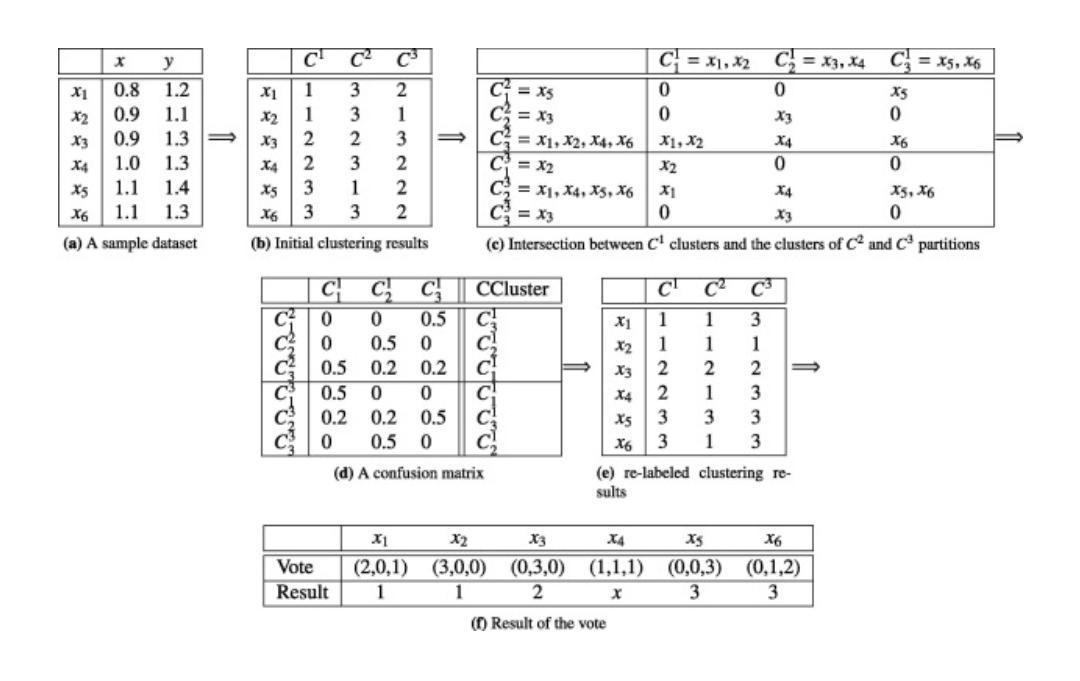

In [ ]:
colon_majority=colon_majority.reset_index(drop=False)
colon_majority.head()

,index,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C1,C2,C3
0,0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.07120,3166.5800,930.3038,2018.3550,2065.5945,...,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.238100,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,0,4,2,3
1,1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.62000,1378.1200,797.1925,1880.1875,1389.6302,...,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.111900,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,0,1,5,5
2,2,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,2648.2676,1073.41000,1207.4163,1201.7687,1733.82390,621.6500,1381.4825,719.4525,967.3576,...,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.377380,62.65250,52.74167,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.46429,76.60375,161.35000,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.81250,0,5,2,3
3,3,7126.5986,3779.0680,3705.5537,6594.5140,2460.9048,3775.6821,2621.4187,2047.2812,6411.2676,3857.1190,1496.4062,1604.2615,1489.9050,1364.1700,2093.50120,3048.0790,1324.5413,1452.9150,2003.4838,2217.3400,3247.1390,3275.5664,3186.0576,1905.6438,1557.7375,3116.1953,925.7202,1644.27620,1902.5725,2218.7424,2194.0725,1298.09250,2604.6350,1743.8225,1068.41880,1901.3812,1749.7913,1746.8438,1033.7079,...,73.46250,105.653570,11.93875,84.57125,37.15750,25.00500,141.43124,132.32375,27.303572,44.940475,73.33250,197.25833,48.70500,39.35375,36.76125,69.35250,36.950000,56.70625,77.884720,34.12250,24.34875,52.284210,36.623215,72.24625,53.30000,154.84125,147.80476,51.03250,80.19000,76.48500,98.53750,54.62143,30.54000,52.96125,37.23625,24.44500,0,5,2,3
4,4,9330.6790,7017.2295,4723.7827,9491.5340,5346.5415,1557.1430,1969.0800,2295.4026,6880.3460,6162.8930,7927.6523,2022.6731,1427.5125,3334.2850,5329.66400,1547.2167,4694.5800,2193.6938,1077.5350,1433.4100,4611.5550,9533.9350,4302.4536,10721.2980,2199.5405,6264.4927,1278.0262,3597.07500,719.1475,3315.9988,4410.2627,3309.94240,6966.7812,3493.0212,478.95874,2721.4500,3580.5900,2497.8113,1448.5900,...,72.83625,225.294050,87.90000,66.09625,26.61625,20.66125,159.64874,190

In [ ]:
clustering_result=colon_majority[['index','C1','C2','C3']]
clustering_result.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
clustering_result

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Datapoint(x),C1,C2,C3
0,0,4,2,3
1,1,1,5,5
2,2,5,2,3
3,3,5,2,3
4,4,0,0,1
5,5,6,6,4
6,6,5,2,3
7,7,4,0,1
8,8,5,2,3
9,9,5,2,3


In [ ]:

num_of_clusters=7
C1_datapoints={}
C2_datapoints={}
C3_datapoints={}
def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
      dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary

C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')
print("C1 clusters :",C1_datapoints)
print("C3 clusters :",C3_datapoints)


def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))

# def union(list1, list2):
#   l = list1 + list2
#   return len(set(l))


contingency_matrix1=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C3_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix1.append(common)
contingency_df1=pd.DataFrame(contingency_matrix1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df1

C1 clusters : {4: [0, 7, 10, 24, 26, 34], 1: [1, 36], 5: [2, 3, 6, 8, 9, 11, 13, 14, 19, 20, 22, 23, 25, 27, 32, 35, 37, 39], 0: [4, 15, 18, 38], 6: [5, 16, 17, 29], 3: [12, 21], 2: [28, 30, 31, 33]}
C3 clusters : {3: [0, 2, 3, 6, 8, 9, 11, 13, 14, 19, 20, 22, 23, 25, 27, 32, 35, 37, 39], 5: [1, 36], 1: [4, 7, 10, 12, 21, 24, 26, 34, 38], 4: [5], 2: [15, 16, 17, 18, 29], 6: [28, 30, 31], 0: [33]}


,C10,C11,C12,C13,C14,C15,C16
C30,0,0,1,0,0,0,0
C31,2,0,0,2,5,0,0
C32,2,0,0,0,0,0,3
C33,0,0,0,0,1,18,0
C34,0,0,0,0,0,0,1
C35,0,2,0,0,0,0,0
C36,0,0,3,0,0,0,0


In [ ]:
print("C1 clusters :",C1_datapoints)
print("C2 clusters :",C2_datapoints)

contingency_matrix2=[]
for i in range(7):
  common=[]
  for j in range(7):
    common_element=common_member(C2_datapoints[i],C1_datapoints[j])
    common.append(common_element)
  contingency_matrix2.append(common)
contingency_df2=pd.DataFrame(contingency_matrix2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
contingency_df2

C1 clusters : {4: [0, 7, 10, 24, 26, 34], 1: [1, 36], 5: [2, 3, 6, 8, 9, 11, 13, 14, 19, 20, 22, 23, 25, 27, 32, 35, 37, 39], 0: [4, 15, 18, 38], 6: [5, 16, 17, 29], 3: [12, 21], 2: [28, 30, 31, 33]}
C2 clusters : {2: [0, 2, 3, 6, 8, 9, 11, 13, 14, 19, 20, 22, 23, 25, 27, 32, 35, 37, 39], 5: [1, 36], 0: [4, 7, 10, 12, 21, 24, 26, 34, 38], 6: [5], 4: [15, 16, 17, 18, 29], 3: [28, 33], 1: [30, 31]}


,C10,C11,C12,C13,C14,C15,C16
C20,2,0,0,2,5,0,0
C21,0,0,2,0,0,0,0
C22,0,0,0,0,1,18,0
C23,0,0,2,0,0,0,0
C24,2,0,0,0,0,0,3
C25,0,2,0,0,0,0,0
C26,0,0,0,0,0,0,1


In [ ]:
contigency_mat=pd.concat([contingency_df2, contingency_df1])
print("-----------Contrigency matrix----------")
contigency_mat

-----------Contrigency matrix----------


,C10,C11,C12,C13,C14,C15,C16
C20,2,0,0,2,5,0,0
C21,0,0,2,0,0,0,0
C22,0,0,0,0,1,18,0
C23,0,0,2,0,0,0,0
C24,2,0,0,0,0,0,3
C25,0,2,0,0,0,0,0
C26,0,0,0,0,0,0,1
C30,0,0,1,0,0,0,0
C31,2,0,0,2,5,0,0
C32,2,0,0,0,0,0,3


In [ ]:

import numpy as np


C1_datapoints={}
C2_datapoints={}
C3_datapoints={}

def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
      dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary

C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')



def union(list1, list2):
  l = list1 + list2
  return len(set(l))

def common_member(list1,list2):
  set1=set(list1)
  set2=set(list2)
  return len(set1.intersection(set2))


union_df1 = []
common_df1 = []

for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C3_datapoints[i],C1_datapoints[j])
    common_element = common_member(C3_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
   
  union_df1.append(uni)
  common_df1.append(common)

confusion_mat1 = np.divide(common_df1, union_df1)
confusion_mat1=pd.DataFrame(confusion_mat1,index=['C30','C31','C32','C33','C34','C35','C36'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df1, union_df1
confusion_mat1

,C10,C11,C12,C13,C14,C15,C16
C30,0.000000,0.0,0.25,0.000000,0.000000,0.000000,0.00
C31,0.181818,0.0,0.00,0.222222,0.500000,0.000000,0.00
C32,0.285714,0.0,0.00,0.000000,0.000000,0.000000,0.50
C33,0.000000,0.0,0.00,0.000000,0.041667,0.947368,0.00
C34,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.25
C35,0.000000,1.0,0.00,0.000000,0.000000,0.000000,0.00
C36,0.000000,0.0,0.75,0.000000,0.000000,0.000000,0.00


In [ ]:

import numpy as np


C1_datapoints={}
C2_datapoints={}
C3_datapoints={}

def clusters(dictionary,clustername):
  for i in clustering_result.index:
    if clustering_result.loc[i,clustername] not in dictionary.keys():
      dictionary[clustering_result.loc[i,clustername]]=[clustering_result.loc[i,'Datapoint(x)']]
    else:
      dictionary[clustering_result.loc[i,clustername]].append(clustering_result.loc[i,'Datapoint(x)'])
  return dictionary

C1_datapoints=clusters(C1_datapoints,'C1')
C2_datapoints=clusters(C2_datapoints,'C2')
C3_datapoints=clusters(C3_datapoints,'C3')


union_df2 = []
common_df2 = []

for i in range(7):
  uni = []
  common = []
  for j in range(7):
    union_element = union(C2_datapoints[i],C1_datapoints[j])
    common_element = common_member(C2_datapoints[i],C1_datapoints[j])
    uni.append(union_element)
    common.append(common_element)
   
  union_df2.append(uni)
  common_df2.append(common)

confusion_mat2 = np.divide(common_df2, union_df2)

confusion_mat2=pd.DataFrame(confusion_mat2,index=['C20','C21','C22','C23','C24','C25','C26'],columns=['C10','C11','C12','C13','C14','C15','C16'])
common_df2, union_df2
confusion_mat2

,C10,C11,C12,C13,C14,C15,C16
C20,0.181818,0.0,0.0,0.222222,0.500000,0.000000,0.00
C21,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.00
C22,0.000000,0.0,0.0,0.000000,0.041667,0.947368,0.00
C23,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.00
C24,0.285714,0.0,0.0,0.000000,0.000000,0.000000,0.50
C25,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.00
C26,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.25


In [ ]:
confusion_mat=pd.concat([confusion_mat2, confusion_mat1])
print("-----------Confusion matrix----------")
confusion_mat

-----------Confusion matrix----------


,C10,C11,C12,C13,C14,C15,C16
C20,0.181818,0.0,0.00,0.222222,0.500000,0.000000,0.00
C21,0.000000,0.0,0.50,0.000000,0.000000,0.000000,0.00
C22,0.000000,0.0,0.00,0.000000,0.041667,0.947368,0.00
C23,0.000000,0.0,0.50,0.000000,0.000000,0.000000,0.00
C24,0.285714,0.0,0.00,0.000000,0.000000,0.000000,0.50
C25,0.000000,1.0,0.00,0.000000,0.000000,0.000000,0.00
C26,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.25
C30,0.000000,0.0,0.25,0.000000,0.000000,0.000000,0.00
C31,0.181818,0.0,0.00,0.222222,0.500000,0.000000,0.00
C32,0.285714,0.0,0.00,0.000000,0.000000,0.000000,0.50


In [ ]:
CCluster = []
CLabel = ['C10', 'C11',	'C12', 'C13',	'C14', 'C15',	'C16']

for i in range(len(confusion_mat)):
  l =confusion_mat.iloc[i]
  l = list(l)
  ind = l.index(max(l))
  CCluster.append(CLabel[ind])
CCluster

['C14',
 'C12',
 'C15',
 'C12',
 'C16',
 'C11',
 'C16',
 'C12',
 'C14',
 'C16',
 'C15',
 'C16',
 'C11',
 'C12']

In [ ]:
confusion_matrix = confusion_mat
confusion_matrix['CCluster'] = CCluster
confusion_matrix.tail(8)

,C10,C11,C12,C13,C14,C15,C16,CCluster
C26,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.25,C16
C30,0.000000,0.0,0.25,0.000000,0.000000,0.000000,0.00,C12
C31,0.181818,0.0,0.00,0.222222,0.500000,0.000000,0.00,C14
C32,0.285714,0.0,0.00,0.000000,0.000000,0.000000,0.50,C16
C33,0.000000,0.0,0.00,0.000000,0.041667,0.947368,0.00,C15
C34,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.25,C16
C35,0.000000,1.0,0.00,0.000000,0.000000,0.000000,0.00,C11
C36,0.000000,0.0,0.75,0.000000,0.000000,0.000000,0.00,C12


In [ ]:
clustering_result['C3'].values

array([3, 5, 3, 3, 1, 4, 3, 1, 3, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 3, 3, 1,
       3, 3, 1, 3, 1, 3, 6, 2, 6, 6, 3, 0, 1, 3, 5, 3, 1, 3])

In [ ]:
C2 = [5, 1, 5, 5, 4, 6, 5, 4, 5, 5, 4, 5, 4, 5, 5, 6, 6, 6, 6, 5, 5, 4, 5, 5, 4, 5, 4, 5, 2, 6, 2, 2, 5, 2, 4, 5, 1, 5, 4, 5]
C3 = [5, 1, 5, 5, 4, 6, 5, 4, 5, 5, 4, 5, 4, 5, 5, 6, 6, 6, 6, 5, 5, 4, 5, 5, 4, 5, 4, 5, 2, 6, 2, 2, 5, 2, 4, 5, 1, 5, 4, 5]

In [ ]:
#Relabeling
new_clustering_result = clustering_result
new_clustering_result['C2'] = C2
new_clustering_result['C3'] = C3
new_clustering_result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Datapoint(x),C1,C2,C3
0,0,4,5,5
1,1,1,1,1
2,2,5,5,5
3,3,5,5,5
4,4,0,4,4
5,5,6,6,6
6,6,5,5,5
7,7,4,4,4
8,8,5,5,5
9,9,5,5,5


In [ ]:
#Majority Voting

C = []
for i in range(len(new_clustering_result)):
  l = new_clustering_result.iloc[i]
  l = list(l[1:])
  majority_label = max(set(l), key = l.count)
  C.append(majority_label)

new_clustering_result['C'] = C
new_clustering_result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Datapoint(x),C1,C2,C3,C
0,0,4,5,5,5
1,1,1,1,1,1
2,2,5,5,5,5
3,3,5,5,5,5
4,4,0,4,4,4
5,5,6,6,6,6
6,6,5,5,5,5
7,7,4,4,4,4
8,8,5,5,5,5
9,9,5,5,5,5


In [ ]:
consensus_clustering_result=new_clustering_result.drop(['C1', 'C2', 'C3'], axis = 1)
consensus_clustering_result

,Datapoint(x),C
0,0,5
1,1,1
2,2,5
3,3,5
4,4,4
5,5,6
6,6,5
7,7,4
8,8,5
9,9,5


In [ ]:
colon_majority.rename(columns={'index': 'Datapoint(x)'}, inplace=True)
colon_majority=colon_majority.merge(consensus_clustering_result,on='Datapoint(x)')
colon_majority=colon_majority.drop(columns=['C1','C2','C3'])
colon_majority

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C
0,0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.59880,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.01430,1135.82390,2365.24240,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.07120,3166.58000,930.3038,2018.35500,2065.59450,...,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.238100,64.71125,88.444440,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.110720,67.56125,259.91250,138.89874,88.23250,39.667860,67.82875,75.67750,83.52250,28.70125,0,5
1,1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.85380,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.44290,734.52875,763.30750,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.62000,1378.12000,797.1925,1880.18750,1389.63020,...,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.111900,75.15500,122.413890,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0,1
2,2,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.69630,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.98930,1903.58250,1568.11130,1368.8175,2648.2676,1073.41000,1207.4163,1201.7687,1733.82390,621.65000,1381.4825,719.45250,967.35760,...,22.07125,6.37000,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.377380,62.65250,52.741670,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.464290,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250,0,5
3,3,7126.5986,3779.0680,3705.5537,6594.5140,2460.9048,3775.6821,2621.4187,2047.2812,6411.2676,3857.1190,1496.4062,1604.2615,1489.90500,1364.1700,2093.50120,3048.0790,1324.5413,1452.9150,2003.4838,2217.3400,3247.1390,3275.5664,3186.0576,1905.6438,1557.7375,3116.1953,925.72020,1644.27620,1902.57250,2218.7424,2194.0725,1298.09250,2604.6350,1743.8225,1068.41880,1901.38120,1749.7913,1746.84380,1033.70790,...,277.92624,46.21875,73.46250,105.653570,11.93875,84.57125,37.15750,25.00500,141.43124,132.32375,27.303572,44.940475,73.33250,197.258330,48.70500,39.35375,36.76125,69.35250,36.950000,56.70625,77.884720,34.12250,24.34875,52.284210,36.623215,72.24625,53.30000,154.84125,147.804760,51.03250,80.19000,76.48500,98.53750,54.621430,30.54000,52.96125,37.23625,24.44500,0,5
4,4,9330.6790,7017.2295,4723.7827,9491.5340,5346.5415,1557.1430,1969.0800,2295.4026,6880.3460,6162.8930,7927.6523,2022.6731,1427.51250,3334.2850,5329.66400,1547.2167,4694.5800,2193.6938,1077.5350,1433.4100,4611.5550,9533.9350,4302.4536,10721.2980,2199.5405,6264.4927,1278.02620,3597.07500,719.14750,3315.9988,4410.2627,3309.94240,6966.7812,3493.0212,478.95874,272

# Cluster: 0

In [ ]:
cluster_0 = colon_majority[colon_majority['C']==0]
cluster_0

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C


# Cluster: 1

In [ ]:
cluster_1 = colon_majority[colon_majority['C']==1]
cluster_1

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C
1,1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.582,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.115,905.6200,1378.1200,797.1925,1880.1875,1389.6302,...,51.04375,104.76250,10.1575,47.02500,460.5675,64.46125,159.98,99.5325,122.0425,97.26750,23.49643,119.1119,75.1550,122.41389,40.4675,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.715,31.10250,193.92,76.97250,224.62024,31.22500,42.65625,16.0925,15.15625,0,1
36,36,4653.2373,6251.5566,4947.1226,3763.5464,2737.1606,2792.5320,2005.7125,2201.1775,2919.9187,4304.520,3431.5662,2122.3596,2822.3962,3008.3174,1941.99050,2817.8042,2185.6562,1898.2925,1456.7100,2051.3826,2400.5862,2481.8926,2075.6090,3912.4412,1843.0906,3177.3286,1108.1143,3163.75500,1501.2162,2256.8926,1743.5737,1964.08370,4127.2790,2214.140,1004.5112,1243.3875,1786.6825,1781.7000,1827.8485,...,45.56500,44.44125,38.5475,36.57738,1436.6688,61.97875,353.81,6.2950,457.5425,201.48625,52.09881,147.2131,54.0025,95.56944,85.4650,7.43500,51.23000,212.51500,28.327633,52.61750,63.615276,8.17625,21.21625,36.746050,26.421429,83.34875,22.17375,45.71250,270.93570,28.980,530.16876,264.92,79.34125,640.05835,7.02625,94.53500,56.8350,31.35000,0,1


# Cluster: 2

In [ ]:
cluster_2 = colon_majority[colon_majority['C']==2]
cluster_2

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C
28,28,14641.931,3377.3933,3048.4326,5401.2266,4734.2990,5167.3750,4434.3286,4553.2450,9515.121,3925.4727,4445.7750,3337.2693,4777.8677,5455.7450,5455.8857,7722.433,4298.3150,4680.4077,3653.1626,3950.3100,8706.2200,9993.688,9131.4270,2194.0613,3370.5469,6788.5750,2172.2417,4783.5186,2549.1226,4988.2340,6446.6963,1604.9338,3987.2312,1874.3612,986.26624,5684.5890,4361.1787,1633.7812,3680.6316,...,2586.04130,158.0125,212.32500,153.08930,119.67000,179.33000,171.85500,138.11750,252.33750,410.82750,83.88452,112.282140,133.60250,433.67220,253.65125,364.49374,88.12625,439.18000,141.051320,23.87625,213.96250,95.60625,95.48875,163.77763,130.65180,106.79375,103.18250,255.65750,211.56548,175.25874,444.22500,164.7150,347.140,616.99646,405.60000,390.89000,116.62125,88.87125,0,2
30,30,14368.276,3651.9910,3302.9275,5738.4860,5115.9130,4890.7856,5008.3286,5643.7812,6013.951,3837.7678,5468.1562,4009.4768,3601.6875,6879.5550,6581.2560,6469.808,6988.9450,4277.1987,2821.5962,3470.4050,6012.3000,8254.451,8120.4650,3694.6290,4202.4624,11454.7100,2714.6345,6801.9385,2321.0562,4907.0864,6563.6187,1994.4462,3666.9275,1996.3838,1404.37120,4449.0186,4555.5312,1442.2800,3773.4960,...,921.68130,96.2125,196.02875,122.57024,260.27374,197.52126,200.46625,104.77250,472.09375,277.67374,80.76428,293.150000,122.08625,142.96944,221.96625,483.85376,98.92000,432.57376,44.421055,57.64375,189.60693,101.55875,135.40750,168.54343,192.56964,381.46250,170.31625,100.00375,246.32619,185.83125,720.59375,154.1475,278.575,303.00000,289.66626,333.59250,97.04625,112.43250,0,2
31,31,6951.354,5565.7773,4480.7850,3667.6465,4278.6167,7568.9287,6299.3613,5174.0913,4038.185,4831.8260,7351.6740,3543.9788,6017.5000,5247.5674,6136.1000,8252.908,6756.0225,4069.5900,3938.1575,4974.4062,3151.0237,9734.153,5191.4336,5199.3486,3514.9750,6789.4014,2365.9000,5809.5410,3799.4375,4098.0300,8193.9870,2092.2476,3630.6611,2888.3300,1582.86000,2216.5425,5038.4224,1624.5700,3165.1230,...,143.79875,53.2050,72.00875,121.63333,69.96375,133.28125,146.67000,113.54875,409.95250,308.43875,85.42262,27.732143,188.86250,834.70830,241.71000,534.78125,118.39000,97.65250,254.198680,57.35875,236.78612,107.09000,140.81500,242.22894,143.74821,112.11500,136.79625,152.51875,192.76071,107.79500,624.72750,155.8225,173.105,297.48690,228.80500,140.87125,66.44375,73.62000,0,2
33,33,11605.972,8278.9180,7316.1040,3602.3518,8093.8750,6572.7500,4314.9814,5917.0264,7675.280,5028.7344,5096.5090,4224.2310,2309.1611,7860.9287,7190.9966,4295.821,8875.9200,2813.4100,2933.3300,3462.9563,6774.8650,10781.306,6473.4873,4618.1035,4620.1377,12061.6000,2516.7024,6943.2490,3135.0325,6089.8975,7018.5327,1814.3375,6491.2850,2700.7524,1617.01500,4989.6610,6190.5760,2229.6562,3442.1038,...,1201.38880,71.8050,155.03000,34.92738,154.88625,57.81750,51.27500,47.29750,566.75370,428.26624,112.68571,121.188100,50.09500,368.18890,239.65375,245.76375,100.44750,317.36374,81.848690,58.21000,188.95000,102.88250,67.08125,66.50131,42.42500,126.90125,92.53125,190.83125,209.34525,105.19750,902.57250,128.0150,203.285,176.21906,66.79875,151.59375,113.53750,65.54500,0,2


# Cluster: 3

In [ ]:
cluster_3 = colon_majority[colon_majority['C']==3]
cluster_3

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C


# Cluster: 4

In [ ]:
cluster_4 = colon_majority[colon_majority['C']==4]
cluster_4

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C
4,4,9330.6790,7017.2295,4723.7827,9491.5340,5346.5415,1557.1430,1969.0800,2295.4026,6880.3460,6162.8930,7927.6523,2022.6731,1427.5125,3334.2850,5329.6640,1547.2167,4694.5800,2193.6938,1077.5350,1433.4100,4611.5550,9533.9350,4302.4536,10721.2980,2199.5405,6264.4927,1278.02620,3597.0750,719.1475,3315.9988,4410.2627,3309.9424,6966.7812,3493.0212,478.95874,2721.4500,3580.5900,2497.8113,1448.5900,...,70.20375,53.78500,72.83625,225.294050,87.90000,66.09625,26.61625,20.66125,159.64874,190.37250,29.241667,21.065475,47.39750,92.908330,84.68875,206.92375,55.13125,81.24125,176.635530,71.23500,577.147200,70.23500,16.50000,8.938158,18.614286,110.21375,16.93000,353.45500,111.13810,42.14625,277.85376,176.10374,149.15625,209.911900,99.91500,122.44125,40.39125,26.84750,0,4
7,7,4913.7990,5215.0480,4288.6160,3213.4304,3147.4023,4460.4463,2334.8086,3302.7625,3855.7712,4319.0290,5199.1950,2579.7114,1943.8275,2555.9375,3371.3013,4847.6626,2619.6062,2329.3513,1918.6375,2737.7087,3121.4688,5193.0576,3024.9675,3013.6038,2617.1190,6432.0737,1626.29280,2683.2588,1829.9800,3971.8413,3146.7560,2443.9775,3092.6700,1965.4650,993.73880,1782.7125,3158.8274,1609.3538,2571.4968,...,88.87500,52.74500,36.40375,37.141666,644.87130,62.15500,128.80750,32.20125,190.09125,163.16250,66.263090,90.209526,42.41250,152.469440,115.21875,69.29625,34.45125,220.47250,44.500000,75.39750,102.454170,65.06000,79.51250,48.584210,39.798214,120.81375,65.43875,249.30376,254.91667,64.88000,435.98126,144.28000,71.16125,212.722630,51.46125,87.35125,47.89875,89.45375,0,4
10,10,7434.8213,6471.2114,5029.6177,4749.3286,1548.4774,7000.1284,3077.4111,3440.9138,5188.9214,9008.6120,2260.7925,1934.1270,2410.1338,1356.3239,1931.6167,5822.5750,2949.2063,2181.6262,2160.3662,2567.9163,4051.4463,4084.8674,3027.8474,6200.6777,2644.1843,3263.1167,965.75354,1815.5300,3306.3425,2487.8037,1402.8175,2938.2788,3335.4087,1152.4612,1808.19750,2719.9424,1397.3050,2135.7600,2035.6536,...,108.38250,56.04500,87.97000,74.069046,38.54875,78.36875,50.16750,36.79000,259.28625,299.26874,42.157143,29.109524,101.56250,156.333330,101.11375,98.65000,50.28125,105.64625,144.897370,72.84875,143.059720,30.27125,90.94375,33.042107,54.285713,85.41500,94.69750,391.34875,139.87500,68.02500,164.21000,104.50500,103.73875,34.886906,154.87875,105.97000,57.70875,25.97250,0,4
12,12,8865.4590,5447.1865,4887.0576,3782.5945,3927.0107,6138.9710,4379.5950,5385.0300,5130.4077,5096.7210,4491.1777,4066.3308,2343.0825,3915.7239,6517.9214,6189.9250,3477.2725,2748.2000,3189.6726,3861.8562,2850.8562,7337.0615,4213.0127,3309.3574,3709.1938,9026.3760,2402.92970,2943.0600,3056.9750,2137.4250,4989.4424,2014.9962,3436.8050,2354.6875,1897.48500,2500.8150,3377.2363,2424.2750,1409.8519,...,118.87250,47.44500,55.54375,61.865475,48.84250,49.85500,25.75625,35.05875,344.93250,251.48625,45.394047,12.820238,104.26125,37.827778,126.00250,74.19875,48.99000,228.66750,143.853940,48.87125,69.734720,28.35250,40.48125,66.384210,43.262500,211.50874,74.17250,238.71250,159.17976,86.30500,253.40250,185.46625,77.13375,5.888095,57.80875,118.89375,44.87625,56.00000,0,4
21,21,8347.9830,9852.2980,8178.9650,4467.5020,3388.4463,5632.5605,3754.5150,4869.5560,5019.0537,4843.6787,6404.3150,3721.8115,3919.8562,3550.6887,4788.1050,4712.1543,3533.0862,3442.7437,2509.0112,2513.4312,2343.1936,5853.3076,2697.5688,5251.4014,3390.9062,5626.5903,2319.14650,3504.1863,2919.8250,3241.5400,2834.3562,1346.9337,3727.8237,2916.3838,2187.2

# Cluster: 5

In [ ]:
cluster_5 = colon_majority[colon_majority['C']==5]
cluster_5

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C
0,0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.59880,1181.6300,2417.9583,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.01430,1135.8239,2365.24240,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.07120,3166.58000,930.3038,2018.35500,2065.59450,...,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.238100,64.71125,88.444440,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.110720,67.56125,259.91250,138.89874,88.23250,39.667860,67.82875,75.67750,83.52250,28.70125,0,5
2,2,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.69630,2285.3088,2576.7488,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.98930,1903.5825,1568.11130,1368.8175,2648.2676,1073.41000,1207.4163,1201.7687,1733.82390,621.65000,1381.4825,719.45250,967.35760,...,22.07125,6.37000,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.377380,62.65250,52.741670,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.464290,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250,0,5
3,3,7126.5986,3779.0680,3705.5537,6594.5140,2460.9048,3775.6821,2621.4187,2047.2812,6411.2676,3857.1190,1496.4062,1604.2615,1489.90500,1364.1700,2093.5012,3048.0790,1324.5413,1452.9150,2003.4838,2217.3400,3247.1390,3275.5664,3186.0576,1905.6438,1557.7375,3116.1953,925.72020,1644.2762,1902.57250,2218.7424,2194.0725,1298.09250,2604.6350,1743.8225,1068.41880,1901.38120,1749.7913,1746.84380,1033.70790,...,277.92624,46.21875,73.46250,105.653570,11.93875,84.57125,37.15750,25.00500,141.43124,132.32375,27.303572,44.940475,73.33250,197.258330,48.70500,39.35375,36.76125,69.35250,36.950000,56.70625,77.884720,34.12250,24.34875,52.284210,36.623215,72.24625,53.30000,154.84125,147.804760,51.03250,80.19000,76.48500,98.53750,54.621430,30.54000,52.96125,37.23625,24.44500,0,5
6,6,4469.0900,5167.0566,4773.6800,3330.3643,3174.2417,3643.6858,3886.4175,3922.9226,2968.0962,2832.2239,2936.3286,2590.7097,2639.30860,2609.5725,2711.7463,3462.9043,1939.0725,1567.6962,2602.1038,2780.7550,1501.7825,4141.8623,2104.1800,2680.4788,3317.6125,4384.3657,1312.08690,2294.8890,1978.40250,1322.0024,2243.1162,1173.63240,3065.0140,1898.8738,1758.87260,842.92126,1458.1900,1752.22750,1454.10120,...,103.80750,53.34875,29.68000,29.408333,163.84750,59.33125,126.22875,48.55375,168.06250,84.07250,47.445236,135.989290,45.20000,127.122220,100.70000,67.18750,55.62625,98.74250,57.725000,30.05375,56.712500,52.95125,28.85375,49.818420,20.307142,171.41125,31.24750,151.92375,185.717860,112.21875,189.05376,80.50000,93.90750,161.810710,29.04125,45.50250,27.07250,34.69250,0,5
8,8,7144.4062,2071.4023,1619.2762,2576.1590,3401.1500,2915.0930,3361.5350,2888.0613,6749.6650,1652.3024,6094.9890,2678.0386,1550.43250,1290.4200,4205.4180,1872.0000,1598.1038,1534.7550,1366.4275,2008.3676,4427.2886,3755.1210,5326.9890,1168.3987,2266.8500,5521.6200,1082.65230,2262.1924,1413.11500,1591.4550,2849.1174,870.00370,1740.2262,832.8113,1453.66250

# Cluster: 6

In [ ]:
cluster_6 = colon_majority[colon_majority['C']==6]
cluster_6

,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C
5,5,14876.407,3201.9045,2327.6262,11248.6800,5893.2790,5319.8570,9939.2460,4058.6438,14144.8350,3282.620,6707.6763,3870.9097,7921.8550,3648.4275,5570.3080,8512.0290,4844.5225,4143.3840,7256.5150,7761.7450,6512.1140,6518.9100,10051.3500,1828.7250,3104.8093,9309.4010,2472.2334,4906.4450,2687.1738,1834.1825,6470.8623,1135.6274,2039.5575,484.6975,2381.2488,5213.7876,5492.2690,762.15625,2233.4790,...,216.68375,113.94625,136.80000,248.82262,103.35000,168.06125,167.61874,172.81000,115.33500,129.23500,48.061905,108.51667,170.93375,451.555570,178.72500,116.95375,38.73875,554.67630,24.321053,37.57875,88.64445,80.67375,149.23375,226.79868,128.655360,66.6850,217.95125,135.54750,306.47263,271.79376,554.19370,65.19750,277.20750,442.78570,377.83875,335.15750,116.66000,58.66375,0,6
15,15,9767.027,9785.7750,8605.0440,4941.2393,3581.5977,7265.1143,6498.4200,3870.2976,6936.5360,6769.043,4984.2236,3014.0713,3380.8474,3193.8738,4816.3584,5862.6875,3756.5625,2328.3000,4156.9023,5241.4473,4045.1362,4489.4663,5136.6523,6243.2460,2547.0593,8041.2954,1772.5940,2913.7250,4126.5312,2104.5774,4498.6763,2059.7324,6723.9673,3895.1726,2526.5874,2912.8674,3553.1626,4111.69730,1959.4453,...,165.08000,81.71500,77.85500,78.12381,168.61874,63.99375,92.71750,35.29125,437.02750,657.18130,35.765476,65.14762,149.41624,75.925000,154.13250,103.07875,134.16500,240.74250,114.969740,38.22125,352.48334,54.11125,24.66125,127.28421,31.405357,157.6275,126.15750,445.05750,153.32380,163.30624,361.15250,201.13126,224.41624,150.85953,101.67000,152.29625,93.10750,33.37500,0,6
16,16,13324.729,9505.0340,7740.9873,7982.8105,2544.9346,10163.2930,9611.0410,2346.1562,8642.8360,8198.136,3186.3025,2319.6538,5880.6340,2399.0637,3481.2512,8076.1167,3513.2112,1487.4137,7498.0490,9255.1640,5071.7500,4162.4526,6341.9385,9146.9540,1640.9781,5440.0522,997.3452,2514.4011,5734.5610,3182.1812,2857.9788,3425.4612,7713.3037,4246.7010,2513.9950,5319.1940,2139.6210,3503.86380,3553.7312,...,191.23875,114.03875,88.75250,197.03810,517.40000,147.91750,214.16500,137.03876,614.03250,670.43750,41.623810,197.35120,269.29500,198.963880,99.20500,74.19000,92.64625,286.38750,230.434200,62.55625,281.83057,63.73625,79.87750,172.88553,92.757140,751.0475,123.62875,485.17250,257.87738,438.38376,424.87750,285.35000,458.70500,182.43095,130.83250,259.91876,73.40500,47.08250,0,6
17,17,12977.712,7565.6157,5735.2000,6911.6800,3095.9333,8961.2930,6641.7950,2801.8600,9363.4340,6413.163,2683.1700,2520.9866,4964.4910,2664.5874,4316.2964,7631.1500,2461.0750,2015.6562,6516.7036,7140.7250,4702.6787,5775.1660,7703.0874,2622.0188,2183.9280,6794.7046,1437.9167,3173.8726,5205.3135,1557.6050,4260.6274,1866.7700,3387.3862,3372.7488,2491.5337,4799.7610,2705.1787,2203.45120,2599.3223,...,1086.95250,131.50750,201.83500,144.29405,169.03876,205.42876,169.88000,101.18750,400.74625,394.27250,44.608334,196.01071,180.83376,403.247220,117.07875,107.04125,106.95750,510.35376,132.955260,45.78000,260.15695,60.79250,56.59750,105.58158,133.442860,177.7500,81.57250,319.14000,278.23690,210.44750,424.33750,201.99374,366.05750,141.27975,119.01500,318.47125,102.54375,34.85750,0,6
18,18,8753.239,8978.1340,7777.8413,6202.4966,4271.4120,8248.8790,5514.2373,3681.1850,7043.5913,12307.913,8021.1377,2890.6904,3754.6663,3593.9688,4053.8940,4819.0083,3890.4200,3816.6274,4531.9300,4865.5137,3191.2488,4477.0737,4033.6511,6940.8390,2689.9812,6356.9644,1818.4595,3226.6550,4336.7060,2600.5950,2775.8489,3636.580

### Centroid of different clusters:

In [ ]:
from sklearn.neighbors import NearestCentroid
colon_majority
X=colon_majority.drop(columns=['Datapoint(x)','Class','C'])
y=colon_majority.C
clf=NearestCentroid()
clf.fit(X,y)
data_centroids=clf.centroids_
pd.DataFrame(data_centroids)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,4239.471150,6610.958950,5158.545700,4234.598200,1951.857100,2182.349900,1665.557500,1836.718100,3108.434950,3545.551000,2936.492450,1805.015350,2069.125000,1931.886200,1372.147625,3034.456300,1483.825600,1758.471250,1261.774350,1528.796900,1918.685600,1570.385650,2000.200150,2996.55115,1499.517200,2310.712500,980.778600,1949.141875,1132.261850,1480.505050,1167.691250,1385.738720,3133.075800,1974.127500,955.065600,1310.753750,1291.937500,1830.943750,1608.739350,1608.739350,...,46.152500,46.322500,48.304375,74.601875,24.352500,41.801190,948.618150,63.220000,256.895000,52.913750,289.792500,149.376875,37.797620,133.162500,64.578750,108.991665,62.966250,6.795625,30.926875,170.754370,26.622369,64.840625,48.529165,11.306250,25.700625,30.775657,16.218750,99.766250,36.523750,58.556875,211.406540,55.847500,280.635630,229.420000,78.156875,432.339295,19.125625,68.595625,36.463750,23.253125
1,11891.883250,5218.519900,4537.062275,4602.427725,5555.675925,6049.959825,5014.249975,5322.035975,6810.634250,4405.950225,5590.528550,3778.738975,4176.554075,6360.949025,6341.059575,6685.242500,6729.800625,3960.151600,3336.561575,3964.519375,6161.102175,9690.899500,7229.203225,3926.53560,3927.030500,9273.571600,2442.369650,6084.561775,2951.162200,5020.811975,7055.708675,1876.491275,4444.026200,2364.956850,1397.628110,4334.952775,5036.427075,1732.571850,3515.338600,3515.338600,...,232.026567,126.224063,1213.227537,94.808750,158.848125,108.055062,151.198435,141.987503,142.566562,100.934062,425.284362,356.301558,90.689282,138.588096,123.661563,444.884710,239.245313,407.223125,101.470937,321.692500,130.379936,49.272188,207.326388,101.784375,109.698125,160.262828,127.348663,181.818125,125.706562,174.752813,214.999407,143.520623,673.029687,150.675000,250.526250,348.425605,247.717503,254.236875,98.412188,85.117188
2,7807.426367,6988.020856,5770.200056,4643.911378,3536.626000,6004.325311,3719.738733,3620.151356,5209.021044,5744.812756,4615.960422,2780.612811,2480.020156,2813.488356,4137.927489,4360.691711,3632.706800,2484.026678,2463.065411,3127.666933,3629.619811,5729.520456,3945.306467,4776.29480,2727.754867,6281.566522,1662.537949,2841.066833,2991.470856,2488.361956,3483.704978,2138.218289,4084.979044,2233.976789,1549.948216,2714.273578,2656.044433,2032.378344,1823.728433,1823.728433,...,79.919306,86.450834,109.694583,67.689167,57.557500,87.161508,258.766254,69.799583,159.157777,35.402500,331.992506,292.605552,44.867459,102.435978,80.446806,150.943210,104.543611,97.830556,84.964860,191.300139,101.826024,51.335972,176.918363,49.675972,39.728333,67.933188,44.375397,163.827916,73.074583,274.376529,160.606083,101.344582,333.064031,159.144306,140.212917,160.669976,68.884583,110.172917,43.930556,36.781944
3,5451.467542,3514.838337,3041.834153,2913.716505,2373.201584,3520.817874,2783.303347,2258.751832,3773.884811,2761.685532,2768.703068,1835.499116,1992.755849,1965.740595,2590.216695,2612.461621,2234.874289,1629.054747,1908.112100,2227.299079,2410.566184,4026.993205,2735.352326,2267.02290,1682.115458,3741.544505,1052.956388,2059.842658,1796.732424,1933.183684,2325.645732,1180.750124,2165.251984,1342.860258,1054.379166,1683.335945,1805.312105,1083.728229,1491.772608,1491.772608,...,58.573158,57.751381,155.588354,44.514474,44.119276,46.616165,229.557566,59.182039,85.154408,36.965987,186.552039,153.882962,24.779825,125.132019,54.822566,135.548978,67.374211,59.345658,55.246250,152.305395,52.500139,28.914211,83.436038,36.871053,27.303224,55.723754,36.934587,162.036383,42.072105,144.960131,108.552255,72.948026,247.978751,70.677171,81.955197,131.988660,55.680263,76.639803,31.368158,37.816250
4,11523.832000,7618.040083,6407.885800,7032.102567,3754.400900,8480.

In [ ]:
datapoints1 = cluster_1
datapoints2 = cluster_2


In [ ]:
#Finding 5 datapoints in cluster 4

import math

centroid_3 = list(data_centroids[2])


l=list(cluster_4.values[0])
l=l[1:-2]
print(len(centroid_3),len(l))

distances = []

for i in range(len(cluster_4)):
  l=list(cluster_4.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_3[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_4_with_distance = cluster_4
cluster_4_with_distance['Distance from centroid'] = distances
cluster_4_with_distance = cluster_4_with_distance.sort_values('Distance from centroid')
cluster_4_with_distance

2000 2000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C,Distance from centroid
7,7,4913.7990,5215.0480,4288.6160,3213.4304,3147.4023,4460.4463,2334.8086,3302.7625,3855.7712,4319.0290,5199.1950,2579.7114,1943.8275,2555.9375,3371.3013,4847.6626,2619.6062,2329.3513,1918.6375,2737.7087,3121.4688,5193.0576,3024.9675,3013.6038,2617.1190,6432.0737,1626.29280,2683.2588,1829.9800,3971.8413,3146.7560,2443.9775,3092.6700,1965.4650,993.73880,1782.7125,3158.8274,1609.3538,2571.4968,...,52.74500,36.40375,37.141666,644.87130,62.15500,128.80750,32.20125,190.09125,163.16250,66.263090,90.209526,42.41250,152.469440,115.21875,69.29625,34.45125,220.47250,44.500000,75.39750,102.454170,65.06000,79.51250,48.584210,39.798214,120.81375,65.43875,249.30376,254.91667,64.88000,435.98126,144.28000,71.16125,212.722630,51.46125,87.35125,47.89875,89.45375,0,4,9711.992328
26,26,9128.1190,5502.7160,4590.1340,3234.4019,3978.5452,7676.7144,4644.3887,2518.6975,5460.9360,4251.5300,2962.7224,1894.2827,2140.4712,2582.0112,4021.4846,3437.2040,3441.9026,1640.2100,3898.9236,3779.0674,4078.8538,3986.6462,5709.8460,2694.9500,1791.1500,6483.6050,1189.77980,2726.3400,3651.9950,1490.7400,3520.1675,1932.9200,3366.1290,1601.0350,1063.82390,3790.5850,2435.1600,1590.3000,1755.1167,...,53.39750,59.31000,49.664288,603.46250,73.55875,171.15000,40.92625,318.34000,543.73250,34.980953,291.090480,31.91125,124.052780,58.60000,124.03625,146.14375,222.54000,62.451317,38.65750,214.056950,41.48625,25.48125,64.497370,84.705360,214.39375,64.33250,314.55250,134.85239,129.21375,440.22626,102.51000,140.32500,173.289290,110.22500,155.92375,40.18125,37.45125,0,4,10854.586885
34,34,7666.6750,6409.7390,6489.8640,2451.1180,4176.2120,4654.6357,2321.5225,3520.3162,4477.4510,7184.0713,2831.0913,2849.5923,1539.0225,3242.0425,3491.6190,2595.5376,3740.6638,2738.0188,1440.5425,2716.0550,3054.1611,7008.1350,4304.8677,5379.2800,2958.4187,6046.3130,1717.27380,2585.6538,2186.6274,2565.0650,2956.5237,2365.4536,4711.9050,1991.8162,1281.01620,2707.2788,2857.0150,1508.5050,2158.5405,...,51.41750,50.81500,24.985714,291.77124,64.48375,75.81125,21.73500,592.24380,318.95750,35.803570,145.546430,47.48625,130.138890,128.42375,34.47375,128.88374,207.98500,49.728947,31.73750,31.602777,42.96000,27.11250,73.719734,58.137500,284.66000,75.21000,333.74000,109.18690,32.20375,601.84750,117.00375,62.32000,167.308330,13.26750,52.09250,47.71750,30.42000,0,4,11341.465882
10,10,7434.8213,6471.2114,5029.6177,4749.3286,1548.4774,7000.1284,3077.4111,3440.9138,5188.9214,9008.6120,2260.7925,1934.1270,2410.1338,1356.3239,1931.6167,5822.5750,2949.2063,2181.6262,2160.3662,2567.9163,4051.4463,4084.8674,3027.8474,6200.6777,2644.1843,3263.1167,965.75354,1815.5300,3306.3425,2487.8037,1402.8175,2938.2788,3335.4087,1152.4612,1808.19750,2719.9424,1397.3050,2135.7600,2035.6536,...,56.04500,87.97000,74.069046,38.54875,78.36875,50.16750,36.79000,259.28625,299.26874,42.157143,29.109524,101.56250,156.333330,101.11375,98.65000,50.28125,105.64625,144.897370,72.84875,143.059720,30.27125,90.94375,33.042107,54.285713,85.41500,94.69750,391.34875,139.87500,68.02500,164.21000,104.50500,103.73875,34.886906,154.87875,105.97000,57.70875,25.97250,0,4,14214.332411
38,38,9112.3720,6824.4863,5982.8460,3147.0430,4847.3080,11222.6820,6333.4727,4299.5024,4644.4424,5888.5464,6527.6500,3105.4250,2482.5662,3450.6100,5076.6640,4989.6875,6692.5986,3717.1100,3561.9775,3590.9976,5292.1360,4991.0100,4514.9385,3117.7375,3144.9407,9123.4600,1915.19400,4192.3726,6196.5015,1917.3475,543

In [ ]:
datapoints3 = cluster_4_with_distance[:5]

In [ ]:
#Finding 5 datapoints in cluster 5


import math

centroid_4 = list(data_centroids[3])

distances = []

for i in range(len(cluster_5)):
  l=list(cluster_5.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_4[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_5_with_distance = cluster_5
cluster_5_with_distance['Distance from centroid'] = distances
cluster_5_with_distance = cluster_5_with_distance.sort_values('Distance from centroid')
cluster_5_with_distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C,Distance from centroid
14,14,5821.6177,3748.2478,3439.9539,2502.9660,1549.6049,4155.7144,3703.2224,1300.3774,4139.2860,3012.6428,967.7850,962.5615,2605.36620,1181.2888,1728.3679,2961.7334,882.8787,736.8738,3053.8050,2884.7188,2462.7100,2727.2737,2861.2000,2771.1050,1037.1375,2444.1382,569.73690,1055.2863,2431.39380,666.5900,1440.6800,1146.45750,2962.8489,1904.2725,1111.72250,1802.72620,1233.9725,1372.88380,1602.74450,...,32.34875,61.25000,32.913094,249.99126,56.33250,98.77000,43.47625,204.39125,180.38625,18.923810,82.917854,88.18250,39.013890,50.25000,45.29625,63.33250,167.57375,84.678950,25.79250,118.595830,30.08875,34.38000,91.671050,52.528572,185.70125,55.07000,116.79500,143.602390,143.46875,250.36375,83.00750,106.09875,54.678570,74.43000,88.44875,16.93750,20.99375,0,5,7522.840431
2,2,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.69630,2285.3088,2576.7488,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.98930,1903.5825,1568.11130,1368.8175,2648.2676,1073.41000,1207.4163,1201.7687,1733.82390,621.65000,1381.4825,719.45250,967.35760,...,6.37000,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.377380,62.65250,52.741670,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.464290,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250,0,5,7532.408597
22,22,5100.5360,3343.3206,2925.6700,2914.1946,1481.2227,3697.9463,2080.2750,1638.0450,3763.1375,3530.0690,2530.7812,1287.1309,1569.98880,1593.4575,1925.3524,2389.9917,2823.5000,2238.2275,1700.2225,1564.8262,2825.6438,2619.1462,2374.8962,3848.0300,1212.9750,3247.4560,804.64764,1730.5325,1801.95870,2032.9575,1745.7225,1879.32250,2278.0000,1659.0000,736.67000,2132.25400,1271.8450,1394.87130,2617.14260,...,42.19625,86.36375,22.157143,224.61874,56.71500,60.26875,25.21250,346.04126,292.11250,12.525000,151.038100,37.99750,44.797222,52.52875,85.69125,66.91375,221.34375,86.106580,32.07875,85.363890,19.01250,15.45625,24.555264,27.973213,380.22000,50.82500,403.64250,79.765470,55.73750,178.39500,71.55125,79.08500,95.108330,104.88875,93.17750,49.62750,50.77625,0,5,7682.250302
13,13,5934.8887,3744.9885,3528.8337,2721.7036,1556.6190,3584.2393,3484.4850,1385.9625,3634.3838,2386.0107,1387.1887,1172.8154,2211.90110,1128.4938,1528.3976,2448.7583,1528.4088,818.4363,2111.7039,2984.0024,2123.0237,2777.7888,2933.1663,3795.6738,1056.5594,2461.8916,743.06310,1374.8239,2015.93000,1644.9912,1588.8138,1367.61250,3590.0874,1840.1274,1058.49760,1716.11000,1075.0762,1230.50500,1453.68130,...,33.74500,61.90500,22.952381,44.96625,58.09375,108.87875,30.56375,247.72750,289.42126,14.307143,59.113094,84.25375,29.966667,39.01500,47.13625,104.99750,113.71250,112.176320,17.18125,141.559720,16.10000,23.92750,82.038155,40.369644,323.85126,68.23875,179.98000,99.955956,146.80250,260.70874,80.30500,120.27625,52.714287,40.53125,113.16000,17.11500,19.75000,0,5,7937.244082
6,6,4469.0900,5167.0566,4773.6800,3330.3643,3174.2417,3643.6858,3886.4175,3922.9226,2968.0962,2832.2239,2936.3286,2590.7097,2639.30860,2609.5725,2711.7463,3462.9043,1939.0725,1567.6962,2602.1038,2780.7550,1501.7825,4141.8623,2104.1800,2680.4788,3317.6125,4384.3657,1312.08690,2294.8890,1978.40250,1322.0024,2243.1162,1173.6

In [ ]:
datapoints4 = cluster_5_with_distance[:5]

In [ ]:
#Finding 5 datapoints in cluster 6


import math

centroid_5 = list(data_centroids[4])

distances = []

for i in range(len(cluster_6)):
  l=list(cluster_6.values[i])
  l=l[1:-2]
  dist = 0
  for i in range(len(l)):
    dist += (l[i] - centroid_5[i])**2
  #print(dist)
  dist = math.sqrt(dist)
  distances.append(dist)

cluster_6_with_distance = cluster_6
cluster_6_with_distance['Distance from centroid'] = distances
cluster_6_with_distance = cluster_6_with_distance.sort_values('Distance from centroid')
cluster_6_with_distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Datapoint(x),H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class,C,Distance from centroid
16,16,13324.729,9505.0340,7740.9873,7982.8105,2544.9346,10163.2930,9611.0410,2346.1562,8642.8360,8198.136,3186.3025,2319.6538,5880.6340,2399.0637,3481.2512,8076.1167,3513.2112,1487.4137,7498.0490,9255.1640,5071.7500,4162.4526,6341.9385,9146.9540,1640.9781,5440.0522,997.3452,2514.4011,5734.5610,3182.1812,2857.9788,3425.4612,7713.3037,4246.7010,2513.9950,5319.1940,2139.6210,3503.86380,3553.7312,...,114.03875,88.75250,197.03810,517.40000,147.91750,214.16500,137.03876,614.03250,670.43750,41.623810,197.35120,269.29500,198.963880,99.20500,74.19000,92.64625,286.38750,230.434200,62.55625,281.83057,63.73625,79.87750,172.88553,92.757140,751.0475,123.62875,485.17250,257.87738,438.38376,424.87750,285.35000,458.70500,182.43095,130.83250,259.91876,73.40500,47.08250,0,6,14387.686569
17,17,12977.712,7565.6157,5735.2000,6911.6800,3095.9333,8961.2930,6641.7950,2801.8600,9363.4340,6413.163,2683.1700,2520.9866,4964.4910,2664.5874,4316.2964,7631.1500,2461.0750,2015.6562,6516.7036,7140.7250,4702.6787,5775.1660,7703.0874,2622.0188,2183.9280,6794.7046,1437.9167,3173.8726,5205.3135,1557.6050,4260.6274,1866.7700,3387.3862,3372.7488,2491.5337,4799.7610,2705.1787,2203.45120,2599.3223,...,131.50750,201.83500,144.29405,169.03876,205.42876,169.88000,101.18750,400.74625,394.27250,44.608334,196.01071,180.83376,403.247220,117.07875,107.04125,106.95750,510.35376,132.955260,45.78000,260.15695,60.79250,56.59750,105.58158,133.442860,177.7500,81.57250,319.14000,278.23690,210.44750,424.33750,201.99374,366.05750,141.27975,119.01500,318.47125,102.54375,34.85750,0,6,16260.649968
15,15,9767.027,9785.7750,8605.0440,4941.2393,3581.5977,7265.1143,6498.4200,3870.2976,6936.5360,6769.043,4984.2236,3014.0713,3380.8474,3193.8738,4816.3584,5862.6875,3756.5625,2328.3000,4156.9023,5241.4473,4045.1362,4489.4663,5136.6523,6243.2460,2547.0593,8041.2954,1772.5940,2913.7250,4126.5312,2104.5774,4498.6763,2059.7324,6723.9673,3895.1726,2526.5874,2912.8674,3553.1626,4111.69730,1959.4453,...,81.71500,77.85500,78.12381,168.61874,63.99375,92.71750,35.29125,437.02750,657.18130,35.765476,65.14762,149.41624,75.925000,154.13250,103.07875,134.16500,240.74250,114.969740,38.22125,352.48334,54.11125,24.66125,127.28421,31.405357,157.6275,126.15750,445.05750,153.32380,163.30624,361.15250,201.13126,224.41624,150.85953,101.67000,152.29625,93.10750,33.37500,0,6,16740.724577
18,18,8753.239,8978.1340,7777.8413,6202.4966,4271.4120,8248.8790,5514.2373,3681.1850,7043.5913,12307.913,8021.1377,2890.6904,3754.6663,3593.9688,4053.8940,4819.0083,3890.4200,3816.6274,4531.9300,4865.5137,3191.2488,4477.0737,4033.6511,6940.8390,2689.9812,6356.9644,1818.4595,3226.6550,4336.7060,2600.5950,2775.8489,3636.5800,5392.2050,3674.7340,2028.6600,3518.4138,2580.6775,3232.29640,4587.9900,...,105.45250,84.24125,114.99524,741.86380,158.87000,800.74750,97.78000,654.58000,315.32250,30.230951,340.80950,173.33500,102.658330,87.94500,98.01250,128.11626,509.33500,117.084210,60.67625,205.25139,59.10250,79.30000,104.19211,79.042854,595.1763,110.49375,68.67000,364.85240,83.44625,558.85126,257.39124,204.82875,702.13090,75.26375,192.88625,95.84375,117.19625,0,6,19717.173950
29,29,9443.878,6671.7773,6260.6160,4905.7090,3139.2488,10926.2180,7376.8500,3245.2512,6518.7363,5336.095,3932.2063,2551.8538,7450.4150,4986.5913,3753.8167,10694.5170,4003.8562,3372.5713,5071.6836,5406.7764,6202.2860,4944.2900,5458.3926,5923.9277,1994.7470,4830.3510,1223.9226,4043.1650,5983.4590,291

In [ ]:
datapoints5 = cluster_6_with_distance[:6]

### Final Reduced Dataset:

In [ ]:
balanced_dataset_with_class0=pd.concat([datapoints1, datapoints2, datapoints3, datapoints4, datapoints5])
balanced_dataset_with_class0 = balanced_dataset_with_class0.drop(['C','Distance from centroid', 'Datapoint(x)'], axis=1)
balanced_dataset_with_class0

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.44290,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.62000,1378.12000,797.1925,1880.18750,1389.6302,1389.6302,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.111900,75.15500,122.413890,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
36,4653.2373,6251.5566,4947.1226,3763.5464,2737.1606,2792.5320,2005.7125,2201.1775,2919.9187,4304.5200,3431.5662,2122.3596,2822.3962,3008.3174,1941.99050,2817.8042,2185.6562,1898.2925,1456.7100,2051.3826,2400.5862,2481.8926,2075.6090,3912.4412,1843.0906,3177.3286,1108.11430,3163.75500,1501.2162,2256.8926,1743.5737,1964.08370,4127.2790,2214.1400,1004.51120,1243.38750,1786.6825,1781.70000,1827.8485,1827.8485,...,29.66500,45.56500,44.44125,38.54750,36.577380,1436.66880,61.97875,353.81000,6.29500,457.54250,201.48625,52.098810,147.213100,54.00250,95.569440,85.46500,7.43500,51.23000,212.51500,28.327633,52.61750,63.615276,8.17625,21.21625,36.746050,26.421429,83.34875,22.17375,45.71250,270.935700,28.98000,530.16876,264.92000,79.34125,640.058350,7.02625,94.53500,56.83500,31.35000,0
28,14641.9310,3377.3933,3048.4326,5401.2266,4734.2990,5167.3750,4434.3286,4553.2450,9515.1210,3925.4727,4445.7750,3337.2693,4777.8677,5455.7450,5455.88570,7722.4330,4298.3150,4680.4077,3653.1626,3950.3100,8706.2200,9993.6880,9131.4270,2194.0613,3370.5469,6788.5750,2172.24170,4783.51860,2549.1226,4988.2340,6446.6963,1604.93380,3987.2312,1874.3612,986.26624,5684.58900,4361.1787,1633.78120,3680.6316,3680.6316,...,130.34500,2586.04130,158.01250,212.32500,153.089300,119.67000,179.33000,171.85500,138.11750,252.33750,410.82750,83.884520,112.282140,133.60250,433.672200,253.65125,364.49374,88.12625,439.18000,141.051320,23.87625,213.962500,95.60625,95.48875,163.777630,130.651800,106.79375,103.18250,255.65750,211.565480,175.25874,444.22500,164.71500,347.14000,616.996460,405.60000,390.89000,116.62125,88.87125,0
30,14368.2760,3651.9910,3302.9275,5738.4860,5115.9130,4890.7856,5008.3286,5643.7812,6013.9510,3837.7678,5468.1562,4009.4768,3601.6875,6879.5550,6581.25600,6469.8080,6988.9450,4277.1987,2821.5962,3470.4050,6012.3000,8254.4510,8120.4650,3694.6290,4202.4624,11454.7100,2714.63450,6801.93850,2321.0562,4907.0864,6563.6187,1994.44620,3666.9275,1996.3838,1404.37120,4449.01860,4555.5312,1442.28000,3773.4960,3773.4960,...,145.72626,921.68130,96.21250,196.02875,122.570240,260.27374,197.52126,200.46625,104.77250,472.09375,277.67374,80.764280,293.150000,122.08625,142.969440,221.96625,483.85376,98.92000,432.57376,44.421055,57.64375,189.606930,101.55875,135.40750,168.543430,192.569640,381.46250,170.31625,100.00375,246.326190,185.83125,720.59375,154.14750,278.57500,303.000000,289.66626,333.59250,97.04625,112.43250,0
31,6951.3540,5565.7773,4480.7850,3667.6465,4278.6167,7568.9287,6299.3613,5174.0913,4038.1850,4831.8260,7351.6740,3543.9788,6017.5000,5247.5674,6136.10000,8252.9080,6756.0225,4069.5900,3938.1575,4974.4062,3151.0237,9734.1530,5191.4336,5199.3486,3514

In [ ]:
og_dataset = pd.read_csv("https://raw.githubusercontent.com/SohelRaja/Consensus-and-Ensemble-Model/main/Datasets/colon.csv",index_col=0)
minority_dataset = og_dataset[og_dataset['Class']=='Normal']
minority_dataset['Class'].replace(to_replace=['Normal'],value=[1],inplace=True)
minority_dataset

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
2,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.36250,2490.87380,3759.5850,4268.9185,4166.19140,4286.69000,2699.28440,2796.08330,1015.91430,1459.1025,2865.03880,1156.95630,1351.9650,3218.32130,3855.53370,3097.4539,1667.54250,2779.30370,1064.26750,2430.87900,2814.28000,2814.28000,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.538100,91.29500,86.036110,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.789290,92.23875,96.27625,150.59000,82.23750,85.033330,152.19500,186.56750,44.47250,16.77375,1
4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.69120,1139.62740,2662.0974,2636.1562,3134.74760,4244.07000,1186.89380,2342.38200,792.21430,1133.2375,969.82370,835.38620,1392.7162,3034.57130,4699.39500,3312.4812,854.42880,1880.54000,1329.32250,3124.24880,2456.09300,2456.09300,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.445240,90.45500,140.830570,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.595250,41.68375,5.92500,183.00626,74.52875,67.710720,48.33875,42.52000,49.98250,16.08500,1
6,2510.3250,1960.6545,1566.3150,3072.8162,1810.2048,1673.5643,1290.4211,2465.8462,1675.5438,1312.8083,2289.0350,2162.2866,2070.0774,3466.7913,2137.41800,2716.3792,1497.1588,1586.2438,962.01000,1214.76750,904.7225,3970.4226,906.59625,1313.05880,1950.39060,1788.14640,1254.51550,1639.1475,819.18870,1454.76250,1227.4187,916.71250,576.78375,745.3400,994.61250,540.46875,1236.07620,422.65625,1374.15540,1374.15540,...,42.30250,26.41500,18.27000,16.17875,36.127380,213.55125,37.78250,29.52500,27.13875,74.56125,34.43875,16.604761,111.280950,61.57250,41.211110,39.77750,28.01250,23.72375,87.18000,6.088158,26.13000,18.765278,50.26000,24.35000,15.419737,13.553571,84.20625,47.47875,73.50500,122.533330,47.53500,147.23625,28.31000,33.19500,91.850000,5.87875,36.29750,9.81500,21.88375,1
8,4028.7100,3156.1592,2870.2550,4417.5913,1854.1060,2828.3037,1427.5262,3390.7063,4373.0440,3080.4512,5784.1210,2222.2078,2502.8100,3616.2460,1673.22620,4623.0790,1871.7600,3154.8286,1624.41130,1150.88500,1309.1838,3015.6390,1206.18750,1640.31500,2641.15000,1752.55360,1531.52860,2560.4424,1293.77620,3926.41750,1013.6188,786.10126,1077.68750,1956.6438,987.24380,749.75000,1259.82390,1215.65250,2276.83420,2276.83420,...,67.69750,63.61125,68.41250,19.34500,62.545240,382.57126,70.14375,21.97125,38.42750,111.66125,33.32250,48.369050,190.659520,45.42625,73.486115,71.57875,56.23500,14.12000,135.63875,45.438156,60.20625,6.072222,46.43875,54.94750,12.184211,38.391070,60.52750,14.93000,96.66000,116.194050,46.67375,172.78876,51.82375,97.85500,98.982140,24.19625,29.76625,44.37625,52.29000,1
10,5271.5176,4740.7680,3318.5137,6792.3480,2632.8894,5449.2070,4623.2124,3277.4038,4488.0600,3343.8108,3830.4250,3046.9463,8878.3090,5729.3213,2763.32250,5865.6580,1828.0662,3078.7437,3741.37000,4443.52000,2707.7550,5904.6025,1806.13870,3337.09620,2910.12820,1769

In [ ]:
balanced_dataset = pd.concat([balanced_dataset_with_class0, minority_dataset])
balanced_dataset

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.83870,1006.21120,1436.7850,658.8787,1924.79130,2080.66110,1155.94380,1444.09640,853.44290,734.52875,763.30750,704.11750,591.8088,807.39374,2138.87260,1734.1150,905.62000,1378.12000,797.19250,1880.18750,1389.63020,1389.63020,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.111900,75.15500,122.413890,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
36,4653.2373,6251.5566,4947.1226,3763.5464,2737.1606,2792.5320,2005.7125,2201.1775,2919.9187,4304.5200,3431.5662,2122.3596,2822.3962,3008.3174,1941.99050,2817.8042,2185.6562,1898.2925,1456.71000,2051.38260,2400.5862,2481.8926,2075.60900,3912.44120,1843.09060,3177.32860,1108.11430,3163.75500,1501.21620,2256.89260,1743.5737,1964.08370,4127.27900,2214.1400,1004.51120,1243.38750,1786.68250,1781.70000,1827.84850,1827.84850,...,29.66500,45.56500,44.44125,38.54750,36.577380,1436.66880,61.97875,353.81000,6.29500,457.54250,201.48625,52.098810,147.213100,54.00250,95.569440,85.46500,7.43500,51.23000,212.51500,28.327633,52.61750,63.615276,8.17625,21.21625,36.746050,26.421429,83.34875,22.17375,45.71250,270.935700,28.98000,530.16876,264.92000,79.34125,640.058350,7.02625,94.53500,56.83500,31.35000,0
28,14641.9310,3377.3933,3048.4326,5401.2266,4734.2990,5167.3750,4434.3286,4553.2450,9515.1210,3925.4727,4445.7750,3337.2693,4777.8677,5455.7450,5455.88570,7722.4330,4298.3150,4680.4077,3653.16260,3950.31000,8706.2200,9993.6880,9131.42700,2194.06130,3370.54690,6788.57500,2172.24170,4783.51860,2549.12260,4988.23400,6446.6963,1604.93380,3987.23120,1874.3612,986.26624,5684.58900,4361.17870,1633.78120,3680.63160,3680.63160,...,130.34500,2586.04130,158.01250,212.32500,153.089300,119.67000,179.33000,171.85500,138.11750,252.33750,410.82750,83.884520,112.282140,133.60250,433.672200,253.65125,364.49374,88.12625,439.18000,141.051320,23.87625,213.962500,95.60625,95.48875,163.777630,130.651800,106.79375,103.18250,255.65750,211.565480,175.25874,444.22500,164.71500,347.14000,616.996460,405.60000,390.89000,116.62125,88.87125,0
30,14368.2760,3651.9910,3302.9275,5738.4860,5115.9130,4890.7856,5008.3286,5643.7812,6013.9510,3837.7678,5468.1562,4009.4768,3601.6875,6879.5550,6581.25600,6469.8080,6988.9450,4277.1987,2821.59620,3470.40500,6012.3000,8254.4510,8120.46500,3694.62900,4202.46240,11454.71000,2714.63450,6801.93850,2321.05620,4907.08640,6563.6187,1994.44620,3666.92750,1996.3838,1404.37120,4449.01860,4555.53120,1442.28000,3773.49600,3773.49600,...,145.72626,921.68130,96.21250,196.02875,122.570240,260.27374,197.52126,200.46625,104.77250,472.09375,277.67374,80.764280,293.150000,122.08625,142.969440,221.96625,483.85376,98.92000,432.57376,44.421055,57.64375,189.606930,101.55875,135.40750,168.543430,192.569640,381.46250,170.31625,100.00375,246.326190,185.83125,720.59375,154.14750,278.57500,303.000000,289.66626,333.59250,97.04625,112.43250,0
31,6951.3540,5565.7773,4480.7850,3667.6465,4278.6167,7568.9287,6299.3613,5174.0913,4038.1850,4831.8260,7351.6740,3543.9788,6017.5000,5247.5674,6136.10000,8252.9080,6756.0225,4069.5900,3938.15750,4974.

In [ ]:
balanced_dataset = balanced_dataset.sample(frac=1)
balanced_dataset

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.69120,1139.62740,2662.0974,2636.1562,3134.74760,4244.07000,1186.89380,2342.38200,792.21430,1133.23750,969.82370,835.38620,1392.7162,3034.57130,4699.39500,3312.4812,854.42880,1880.54000,1329.32250,3124.24880,2456.09300,2456.09300,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.445240,90.45500,140.830570,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.595250,41.68375,5.92500,183.00626,74.52875,67.710720,48.33875,42.52000,49.98250,16.08500,1
28,14641.9310,3377.3933,3048.4326,5401.2266,4734.2990,5167.3750,4434.3286,4553.2450,9515.1210,3925.4727,4445.7750,3337.2693,4777.8677,5455.7450,5455.88570,7722.4330,4298.3150,4680.4077,3653.16260,3950.31000,8706.2200,9993.6880,9131.42700,2194.06130,3370.54690,6788.57500,2172.24170,4783.51860,2549.12260,4988.23400,6446.6963,1604.93380,3987.23120,1874.3612,986.26624,5684.58900,4361.17870,1633.78120,3680.63160,3680.63160,...,130.34500,2586.04130,158.01250,212.32500,153.089300,119.67000,179.33000,171.85500,138.11750,252.33750,410.82750,83.884520,112.282140,133.60250,433.672200,253.65125,364.49374,88.12625,439.18000,141.051320,23.87625,213.962500,95.60625,95.48875,163.777630,130.651800,106.79375,103.18250,255.65750,211.565480,175.25874,444.22500,164.71500,347.14000,616.996460,405.60000,390.89000,116.62125,88.87125,0
33,11605.9720,8278.9180,7316.1040,3602.3518,8093.8750,6572.7500,4314.9814,5917.0264,7675.2800,5028.7344,5096.5090,4224.2310,2309.1611,7860.9287,7190.99660,4295.8210,8875.9200,2813.4100,2933.33000,3462.95630,6774.8650,10781.3060,6473.48730,4618.10350,4620.13770,12061.60000,2516.70240,6943.24900,3135.03250,6089.89750,7018.5327,1814.33750,6491.28500,2700.7524,1617.01500,4989.66100,6190.57600,2229.65620,3442.10380,3442.10380,...,129.08624,1201.38880,71.80500,155.03000,34.927380,154.88625,57.81750,51.27500,47.29750,566.75370,428.26624,112.685710,121.188100,50.09500,368.188900,239.65375,245.76375,100.44750,317.36374,81.848690,58.21000,188.950000,102.88250,67.08125,66.501310,42.425000,126.90125,92.53125,190.83125,209.345250,105.19750,902.57250,128.01500,203.28500,176.219060,66.79875,151.59375,113.53750,65.54500,0
62,7472.0100,3653.9340,2728.2163,3494.4805,2404.6655,5791.6070,2876.4211,2150.9587,3767.0024,2685.3000,3280.8462,1655.3058,2565.4300,3764.3638,2919.90000,3681.3500,3288.5000,2148.9275,2331.12260,1993.01120,3532.6400,3658.9575,3263.82620,1036.36760,1541.11880,3364.62500,934.97736,3162.64380,2912.83000,3381.22120,1975.7037,1911.40120,2886.57740,1747.9625,786.16376,2404.91500,2080.17000,1164.65120,2915.10640,2915.10640,...,68.37625,135.34375,109.50125,33.02750,57.547620,1123.04630,94.34250,129.86250,46.10625,198.97874,132.05000,36.664288,801.296450,45.76125,193.786120,95.51875,72.45875,67.89625,316.35626,61.511840,62.51375,47.151390,34.10875,56.74375,58.303947,70.683930,309.56000,78.00375,123.30750,178.946430,63.63500,437.65250,178.27250,153.84875,269.436900,67.86250,77.21500,49.86250,39.63125,1
30,14368.2760,3651.9910,3302.9275,5738.4860,5115.9130,4890.7856,5008.3286,5643.7812,6013.9510,3837.7678,5468.1562,4009.4768,3601.6875,6879.5550,6581.25600,6469.8080,6988.9450,4277.1987,2821

In [ ]:
balanced_dataset.to_csv('balanced_dataset_colon.csv', index = False)
from google.colab import files
files.download("balanced_dataset_colon.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>